In [145]:
# Imports
import os
import math as math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
from astropy.io import fits
import astropy.units as u
import hcipy as hc

os.chdir('../../pastis/')
import util_pastis as util
from e2e_simulators.luvoir_imaging_onephot import LuvoirAPLC

In [2]:
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Computer Modern Sans"]
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{cmbright}"
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.titlesize'] = 16

In [ ]:
linestyle_str = [
     ('solid', 'solid'),      # Same as (0, ()) or '-'
     ('dotted', 'dotted'),    # Same as (0, (1, 1)) or '.'
     ('dashed', 'dashed'),    # Same as '--'
     ('dashdot', 'dashdot')]  # Same as '-.'

linestyle_tuple = [
     ('loosely dotted',        (0, (1, 10))),
     ('dotted',                (0, (1, 1))),
     ('densely dotted',        (0, (1, 1))),

     ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),

     ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]

In [146]:
def to_precision(x,p):
    """
    returns a string representation of x formatted with a precision of p

    Based on the webkit javascript implementation taken from here:
    https://code.google.com/p/webkit-mirror/source/browse/JavaScriptCore/kjs/number_object.cpp
    """

    x = float(x)

    if x == 0.:
        return "0." + "0"*(p-1)

    out = []

    if x < 0:
        out.append("-")
        x = -x

    e = int(math.log10(x))
    tens = math.pow(10, e - p + 1)
    n = math.floor(x/tens)

    if n < math.pow(10, p - 1):
        e = e -1
        tens = math.pow(10, e - p+1)
        n = math.floor(x / tens)

    if abs((n + 1.) * tens - x) <= abs(n * tens -x):
        n = n + 1

    if n >= math.pow(10,p):
        n = n / 10.
        e = e + 1

    m = "%.*g" % (p, n)

    if e < -2 or e >= p:
        out.append(m[0])
        if p > 1:
            out.append(".")
            out.extend(m[1:p])
        out.append('e')
        if e > 0:
            out.append("+")
        out.append(str(e))
    elif e == (p -1):
        out.append(m)
    elif e >= 0:
        out.append(m[:e+1])
        if e+1 < len(m):
            out.append(".")
            out.extend(m[e+1:])
    else:
        out.append("0.")
        out.extend(["0"]*-(e+1))
        out.append(m)

    return "".join(out)

In [10]:
Ntimes = 20
TimeMinus = -2
TimePlus = 3.5
Nwavescale = 20
WaveScaleMinus = -2
WaveScalePlus = 2
Nflux = 10
fluxPlus = 9
fluxMinus = 0
Niter = 100
timeVec = np.logspace(TimeMinus,TimePlus,Ntimes)
WaveVec = np.logspace(WaveScaleMinus,WaveScalePlus,Nwavescale)
fluxVec = np.linspace(fluxMinus,fluxPlus,Nflux)

In [174]:
# cd pastis

/Users/pueyo/PythonPackages/PASTIS/pastis


In [176]:
res1 = np.loadtxt("LObatchDH.csv", delimiter=",")
res2 = np.loadtxt("LObatchLOWFS.csv", delimiter=",")
res3 = np.loadtxt("LOrecursiveDH.csv", delimiter=",")
res4 = np.loadtxt("LOrecursiveLOWFS.csv", delimiter=",")

In [177]:
contrast_floor = 3.924822663883781e-11

In [184]:
res_Mat1 = np.reshape(res1,[Ntimes,Nwavescale,Nflux,1])
res_Mat2 = np.reshape(res2,[Ntimes,Nwavescale,Nflux,1])
res_Mat3 = np.reshape(res3,[Ntimes,Nwavescale,Nflux,1])
res_Mat4 = np.reshape(res4,[Ntimes,Nwavescale,Nflux,1])

In [192]:
WaveVec[14]

8.858667904100823

Text(0.5, 1.0, 'LO modes, 5 mag star, batch WFS sensing algorithm')

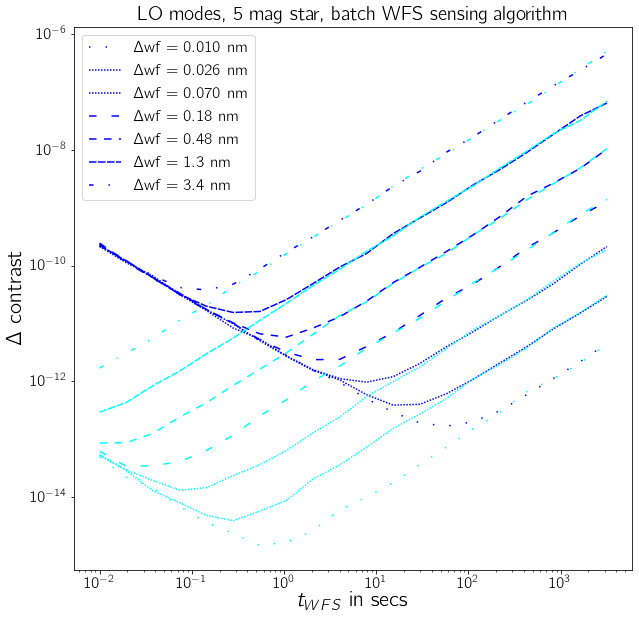

In [180]:
plt.figure(figsize=(10, 10))
for wavefront_index  in np.arange(0,14,2):
    wavefront_factor = WaveVec[wavefront_index]
    labeltext = '$\Delta$wf = ' + to_precision(wavefront0*wavefront_factor,2)+' nm'
    index_line = np.int(wavefront_index/2)
    plt.plot(timeVec,res_Mat1[:,wavefront_index,4] - contrast_floor,linestyle = linestyle_tuple[index_line][1],linewidth=1.5, color='blue',label = labeltext)
for wavefront_index  in np.arange(0,14,2):
    wavefront_factor = WaveVec[wavefront_index]
    labeltext = '$\Delta$wf = ' + to_precision(wavefront0*wavefront_factor,2)+' nm, using LOWFS'
    index_line = np.int(wavefront_index/2)
    plt.plot(timeVec,res_Mat2[:,wavefront_index,4] - contrast_floor,linestyle = linestyle_tuple[index_line][1],linewidth=1.5, color='cyan')
plt.semilogy()
plt.semilogx()
plt.xlabel('$t_{WFS}$ in secs')
plt.ylabel('$\Delta$ contrast')
plt.legend()
plt.title('LO modes, 5 mag star, batch WFS sensing algorithm',fontsize = 20)

Text(0.5, 1.0, 'LO modes, 10 mag star, batch WFS sensing algorithm')

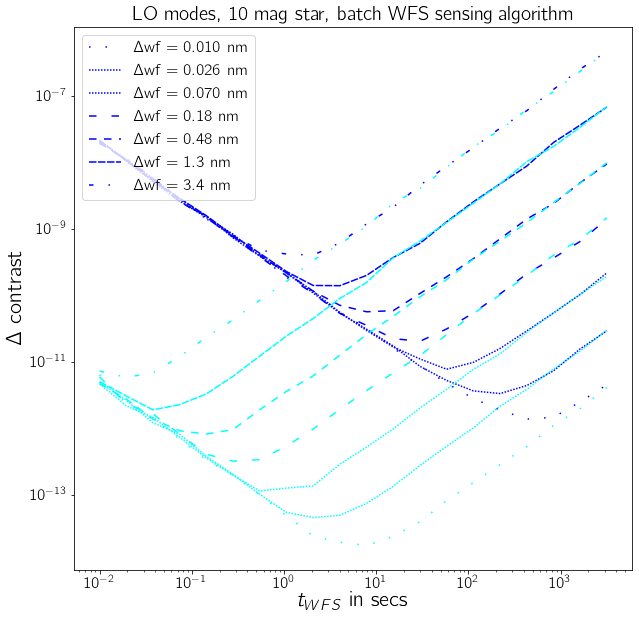

In [181]:
plt.figure(figsize=(10, 10))
for wavefront_index  in np.arange(0,14,2):
    wavefront_factor = WaveVec[wavefront_index]
    labeltext = '$\Delta$wf = ' + to_precision(wavefront0*wavefront_factor,2)+' nm'
    index_line = np.int(wavefront_index/2)
    plt.plot(timeVec,res_Mat1[:,wavefront_index,9] - contrast_floor,linestyle = linestyle_tuple[index_line][1],linewidth=1.5, color='blue',label = labeltext)
for wavefront_index  in np.arange(0,14,2):
    wavefront_factor = WaveVec[wavefront_index]
    labeltext = '$\Delta$wf = ' + to_precision(wavefront0*wavefront_factor,2)+' nm, using LOWFS'
    index_line = np.int(wavefront_index/2)
    plt.plot(timeVec,res_Mat2[:,wavefront_index,9] - contrast_floor,linestyle = linestyle_tuple[index_line][1],linewidth=1.5, color='cyan')
plt.semilogy()
plt.semilogx()
plt.xlabel('$t_{WFS}$ in secs')
plt.ylabel('$\Delta$ contrast')
plt.legend(loc = 'upper left')
plt.title('LO modes, 10 mag star, batch WFS sensing algorithm',fontsize = 20)

Text(0.5, 1.0, 'LO modes, 10 mag star, recursive WFS sensing algorithm')

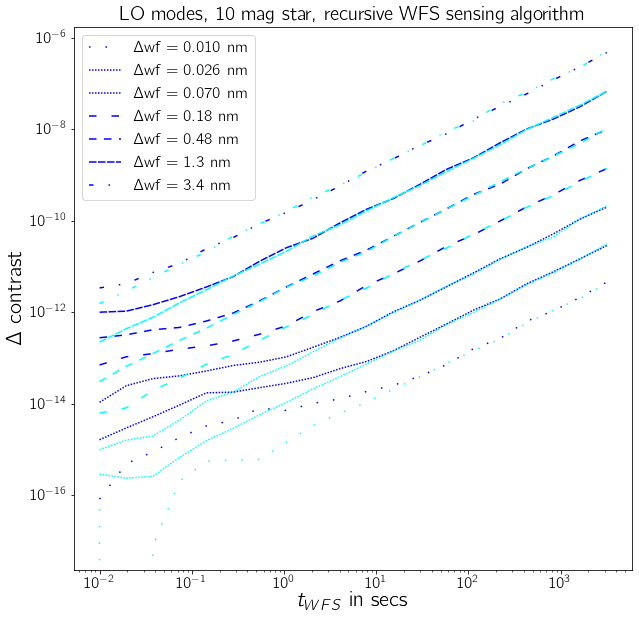

In [190]:
plt.figure(figsize=(10, 10))
for wavefront_index  in np.arange(0,14,2):
    wavefront_factor = WaveVec[wavefront_index]
    labeltext = '$\Delta$wf = ' + to_precision(wavefront0*wavefront_factor,2)+' nm'
    index_line = np.int(wavefront_index/2)
    plt.plot(timeVec,res_Mat3[:,wavefront_index,0] - contrast_floor,linestyle = linestyle_tuple[index_line][1],linewidth=1.5, color='blue',label = labeltext)
for wavefront_index  in np.arange(0,14,2):
    wavefront_factor = WaveVec[wavefront_index]
    labeltext = '$\Delta$wf = ' + to_precision(wavefront0*wavefront_factor,2)+' nm, using LOWFS'
    index_line = np.int(wavefront_index/2)
    plt.plot(timeVec,res_Mat4[:,wavefront_index,0] - contrast_floor,linestyle = linestyle_tuple[index_line][1],linewidth=1.5, color='cyan')
plt.semilogy()
plt.semilogx()
plt.xlabel('$t_{WFS}$ in secs')
plt.ylabel('$\Delta$ contrast')
plt.legend(loc = 'upper left')
plt.title('LO modes, 10 mag star, recursive WFS sensing algorithm',fontsize = 20)

In [245]:
15/1024

0.0146484375

###### 